### E-commerce Store Analysis


Getting the data

In [32]:
import pandas as pd 

data = pd.read_csv("Ecommerce Customers")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [33]:
# check for any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [34]:
# delete the email address and avatar columns
data = data.drop(["Email" , "Address" , "Avatar"] , axis=1)

In [35]:
# Split the data into train and test data 
train_data = data[:int(500*0.8)]
test_data = data[int(500*0.8):]
test_data


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
400,33.172331,13.078692,37.329819,5.405406,663.074818
401,33.247322,11.956426,36.517346,3.451751,506.375867
402,33.598913,13.252737,37.305961,2.935577,528.419330
403,33.085298,13.093537,38.315648,4.750360,632.123588
404,32.278443,12.527472,36.688367,3.531402,488.270298
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


Check relationship between Avg. Session Length and Yearly Amount Spent

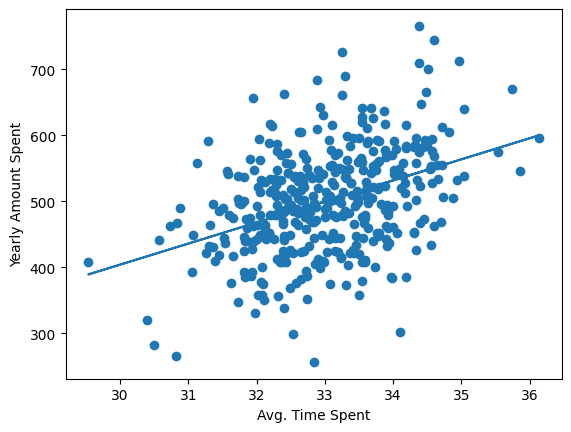

The coefficient of correlation is:  0.39726338720882065


In [36]:
import matplotlib.pyplot as plt 
from scipy import stats

x = train_data["Avg. Session Length"]
y = train_data["Yearly Amount Spent"]
slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope*x + intercept

model = list(map(myfun , x))
plt.scatter(x , y)
plt.plot(x,model)
plt.xlabel("Avg. Time Spent")
plt.ylabel("Yearly Amount Spent")
plt.show()
print("The coefficient of correlation is: ", r)


The coffiecient is only 0.39 showing that there is not good relationship between avg. time spent and yearly amount spent. Therefore, it is not a good indicator

Check relationship between Time on App and Yearly Amount Spent

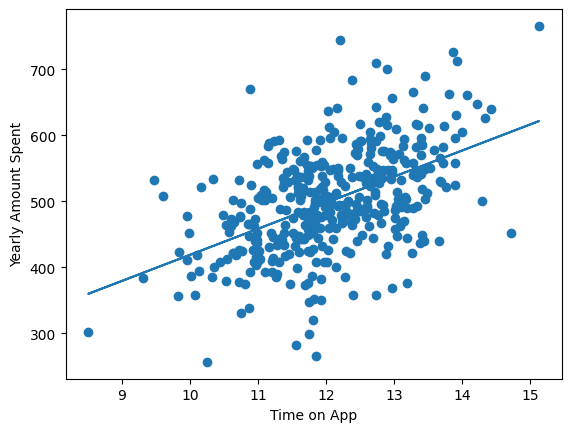

The coefficient of correlation is:  0.5013178168518133


In [37]:

x = train_data["Time on App"]
y = train_data["Yearly Amount Spent"]
slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope*x + intercept

model = list(map(myfun , x))
plt.scatter(x , y)
plt.plot(x,model)
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.show()
print("The coefficient of correlation is: ", r)

The coefficient is 0.5.  Time on App is not a perfect indicator for predicting the Amount spent but it is certainly better indicator than Avg. Time Spent.

Check relationship between Time on Website and Yearly Amount Spent

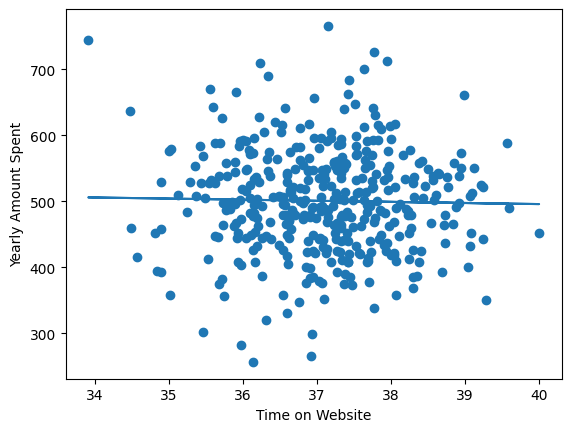

The coefficient of correlation is:  -0.021389301369613256


In [38]:
x = train_data["Time on Website"]
y = train_data["Yearly Amount Spent"]
slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope*x + intercept

model = list(map(myfun , x))
plt.scatter(x , y)
plt.plot(x,model)
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.show()
print("The coefficient of correlation is: ", r)

The coefficient of correlation is very low indicating that Time spent on websites by customers does not show any relation to how much the customers will spend money.

Check relationship between Length of Membership and Yearly Amount Spent

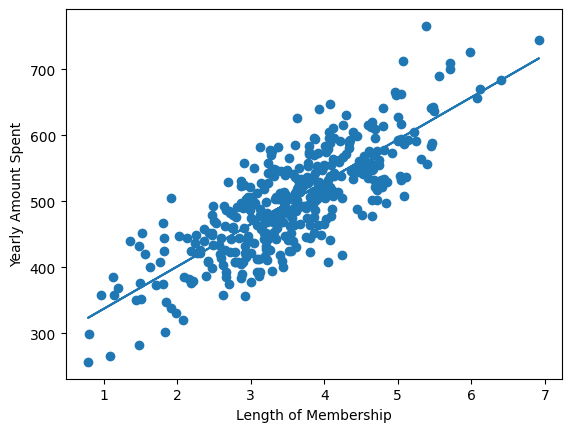

The coefficient of correlation is:  0.8023014262910735


In [39]:
x = train_data["Length of Membership"]
y = train_data["Yearly Amount Spent"]
slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope*x + intercept

model = list(map(myfun , x))
plt.scatter(x , y)
plt.plot(x,model)
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()
print("The coefficient of correlation is: ", r)

Length of Membership definetely shows a significant impact on how much a customer might spend money on products. The people who have been a member for a longer time are likely to spend more money than other people.
Length of Membership is by far the best indicator for prediciting the customer's yearly expenditure.

In [40]:
train_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
395,31.445972,12.846499,37.869217,3.420150,484.876965
396,35.742670,10.889828,35.565436,6.115199,669.987141
397,34.012619,12.914570,36.046204,3.488030,547.709989
398,34.140393,11.568527,38.918749,4.082855,537.825282


Now let's train our model using multi-variable regression and try to predict the yearly amount spent

In [41]:
from sklearn import linear_model

x = train_data[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y = train_data['Yearly Amount Spent']

# train the model
regr = linear_model.LinearRegression()
regr.fit(x,y)

cdf = pd.DataFrame(regr.coef_ , x.columns , columns=["Coef" ])
cdf


,Coef
Avg. Session Length,25.576288
Time on App,38.345474
Time on Website,0.593094
Length of Membership,61.182253


### We can say that Time on Website is the worst predictor and Length of Membership is the best predictor. And as Time on App seems to have more impact in whether a customer buys a product, the company should put more focus on making the app more user-friendly and improve the customer experience. They should also look at why website sells are not performing that well and try to solve and improve customer experience on the website as well to improve their sells. They should definitely focus on making their loyalty and membership programs more attractive to the customers.

Let's predict the Yearly Amount Spent using our test data

In [42]:
test = test_data[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
result = regr.predict(test)

result

array([656.53182746, 495.4050683 , 522.99217803, 615.38255148,
       497.4964396 , 500.76291281, 425.20749828, 419.01697905,
       481.74527484, 518.05632706, 607.90566062, 600.85210474,
       467.37139755, 497.76514136, 546.16417418, 282.28888056,
       507.2560816 , 446.14773139, 502.25581095, 478.31939136,
       647.96177913, 558.33921848, 626.93993035, 457.69487285,
       497.5062451 , 576.1633185 , 534.55273655, 578.18055091,
       557.70976655, 491.18624057, 547.92198686, 479.58620929,
       508.25807821, 434.88185925, 314.92189784, 572.89624926,
       582.96375103, 451.01628418, 399.60248079, 574.38149884,
       500.71533089, 486.93636324, 316.97439683, 548.08092536,
       427.67763992, 513.70459553, 531.20087059, 315.73232443,
       478.9900598 , 452.07978091, 473.89500771, 431.08579947,
       506.57803966, 480.19870705, 449.67654923, 447.94855878,
       394.69643466, 531.91841961, 542.55776388, 419.60224464,
       587.88989154, 495.69260639, 405.4429639 , 399.05

Let's compare our predicted data with the actual given data 

Text(0, 0.5, 'Actual result')

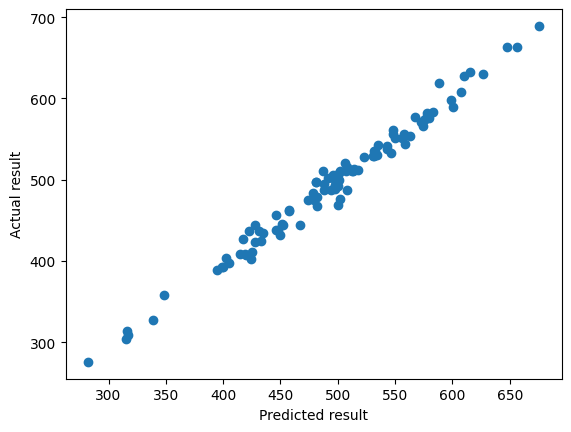

In [43]:
actual_result = test_data['Yearly Amount Spent']

plt.scatter(result , actual_result)
plt.xlabel("Predicted result")
plt.ylabel("Actual result")

In [44]:
from sklearn.metrics import mean_absolute_error , mean_squared_error 
import math

print("Mean absolute error: " , mean_absolute_error(result , actual_result))
print("Mean squared error: " , mean_squared_error(result , actual_result))
print("Root mean squared error: " , math.sqrt(mean_squared_error(result , actual_result)))


Mean absolute error:  8.222577352952001
Mean squared error:  112.51939038010785
Root mean squared error:  10.607515749698788


We can say that the model is very accurate in predicting the yearly spent amount with the error of just 10 dollars(max).

Residuals analysis

(array([ 2.,  3.,  5., 19., 30., 15., 14., 10.,  1.,  1.]),
 array([-30.8001242 , -24.62450389, -18.44888358, -12.27326328,
         -6.09764297,   0.07797734,   6.25359765,  12.42921796,
         18.60483827,  24.78045858,  30.95607889]),
 <BarContainer object of 10 artists>)

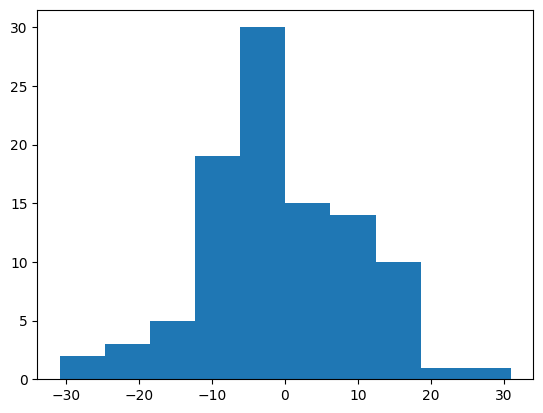

In [45]:
residual = actual_result - result
plt.hist(residual , bins=10)